##Banco de dados em nuvem

##DataBricks

**Origem do DataBricks**

O Databricks foi criado em 2013 por um grupo de engenheiros que trabalhavam juntos no laboratório de inteligência artificial da Universidade da Califórnia em Berkeley. Esses engenheiros foram os mesmos responsáveis pelo desenvolvimento do Apache Spark, um motor de processamento distribuído de dados em larga escala, que se tornou muito popular entre as empresas de tecnologia. A ideia de criar o Databricks surgiu da necessidade de oferecer uma plataforma mais fácil de usar e mais amigável para o Apache Spark, que pudesse atender às demandas cada vez maiores das empresas por análise de dados em tempo real e aprendizado de máquina.

**O que é o DataBricks**

a plataforma do Databricks como uma solução de computação em nuvem que pode ser usada para processamento, transformação e exploração de grandes volumes de dados. Ela foi projetada para permitir que os usuários se concentrem em análises de dados avançadas e na tomada de decisões baseadas em dados, de uma forma mais simples.
A plataforma é altamente escalável e pode ser configurada para trabalhar com vários serviços em nuvem, incluindo Amazon Web Services (AWS), Microsoft Azure e Google Cloud Platform.

**Como é o uso do DataBricks**

 Databricks foi construído em cima Apache Spark e utiliza clusters para o processamento de grandes volumes de dados de forma distribuída, o que a torna uma ferramenta eficiente e escalável. Ela possibilita ao próprio usuário utilizar sua interface simples para gerenciar seus clusters.

Para usar a plataforma Databricks, os usuários criam notebooks, que são documentos interativos que permitem escrever e executar código para processar dados. Os notebooks podem incluir código em várias linguagens de programação, como Python, R e SQL.

Além disso, a plataforma também possui recursos para construção de pipelines, permitindo que os usuários processem dados em etapas e visualizem os resultados em tempo real. Em resumo, o Databricks é uma plataforma de processamento de dados flexível e eficiente que oferece uma variedade de ferramentas para ajudar as empresas a processar e analisar dados.

## Premissas para construção do Tech Challenge Fase 3

Iniciamos o trabalho com uma prévia análise dos arquivos encontrados no site do IBGE, após essa análise inicial definimos os mês que iriamos trabalhar e também definimos as estruturas das bases necessárias para modelagem e construção de um tabela final com os dados prontos e as informações necessárias para elaboração da análise final.

**Catálogo**

As informações contidas no catálogo foram dividisas e se tornaram duas tabelas dimenssão, uma contedo as iformamções de Estado (UF), e outra tabela com as informações de perguntas e respostas.

**Tabela Fato**

A tabela fato contém as iformações necessárias para elaboração das analises, com base nos arquivos mensais que contém todos os dados coletados.

Para elaboração e modelagem da tabela fato, separamos as seguintes premissas:

_Meses:_

Julho, Agosto e Setembro

_Dados demograficos:_

A002	Idade do morador 

A003	Sexo

A004	Cor ou raça

A005	Escolaridade

V1022	Situação do domicílio

V1023	Tipo de área


_Perguntas estratégicas para elaboração da análise:_

B0011	Na semana passada teve febre?

B00111	Na semana passada teve perda de cheiro ou sabor?

B0012	Na semana passada teve tosse?

B0013	Na semana passada teve dor de garganta?

B0015	Na semana passada teve dor de cabeça?

B002	Por causa disso, foi a algum estabelecimento de saúde?

B0033	Providência tomada  para recuperar dos sintomas foi comprar e/ou tomar  remédio por conta própria

B0034	Providência tomada para recuperar dos sintomas foi comprar e/ou tomar remédio por orientação médica

B007	Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público

B0101	Algum médico já lhe deu o diagnóstico de diabetes?

B0102	Algum médico já lhe deu o diagnóstico de hipertensão?

B0103	Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?

B0104	Algum médico já lhe deu o diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)?

B011	Qual foi o resultado do teste?  Na semana passada, devido à pandemia do Coronavírus, em que medida o(a) Sr(a) 
restringiu o contato com as pessoas? 

C007C	Que tipo de trabalho, cargo ou função você realiza no seu trabalho (único ou principal)? 

F002A1	No seu domicílio há os seguintes itens básicos de limpeza e proteção: sabão ou detergente

F002A2	No seu domicílio há os seguintes itens básicos de limpeza e proteção: álcool 70% ou superior (gel ou líquido)

F002A3	No seu domicílio há os seguintes itens básicos de limpeza e proteção: máscaras

F002A5	No seu domicílio há os seguintes itens básicos de limpeza e proteção: água sanitária ou desinfetante


##Preparando o Banco de Dados para modelagem das tabelas

Os arquivos originais foram carrados no Banco de Dados:




![imagem](https://github.com/rafaelcurti/Tech-Challenge-3-FIAP/blob/main/BASES.jpg?raw=true)


Criação do cluster para configuração da nuvem que irá ajudar a processar os nossos conjuntos de dados. Ele usa o Apache Spark para executar tarefas como limpeza de dados, análise e aprendizado de máquina.

![imagem](https://github.com/rafaelcurti/Tech-Challenge-3-FIAP/blob/main/Cluster.jpg?raw=true)

Com os arquivos de dados carregados no Banco, inciamos as modelagens das bases para análise.

##Instação dos programas

In [0]:
!pip install pyspark


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4f9b92b6-f117-484c-8ff1-62e84068a123/bin/python -m pip install --upgrade pip' command.


In [0]:
!pip install findspark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4f9b92b6-f117-484c-8ff1-62e84068a123/bin/python -m pip install --upgrade pip' command.


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps

##Transformação das Bases Julho, Agosto e Setembro

Transformando base de Julho

In [0]:
# Essa é a variável onde o caminho do arquivo será armazenado
julho = '/FileStore/tables/PNAD_COVID_072020.csv'

In [0]:
#Fazendo a leitura no formato CSV e carregando em uma estrutura de dados do tipo DataFrame
pd_julho = ps.read_csv(julho)

In [0]:
# Exibindo as primeiras linhas de dados do DataFrame
pd_julho.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11,NaN,1,4,7,3,1110011,110015970,1,1,152452,130.595605,149.671109,1114,1,1,5,8,1984,35,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2
1,2020,11,11,NaN,1,4,7,3,1110011,110015970,1,1,154289,130.595605,145.296688,1123,2,2,18,8,1990,29,2,4,7,2.0,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,3,2.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,10.0,1.0,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2
2,2020,11,11,NaN,1,4,7,3,1110011,110015970,1,1,145749,130.595605,166.254114,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2
3,2020,11,11,NaN,1,4,7,3,1110011,110015970,1,1,145749,130.595605,166.254114,1112,4,4,24,8,2009,10,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2
4,2020,11,11,NaN,2,1,7,3,1110011,110015970,1,1,91395,130.595605,126.960477,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,3,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1


In [0]:
# Selecionando apenas algumas colunas específicas do DataFrame
pd_julho = pd_julho[['Ano', 'UF', 'CAPITAL','V1013', 'V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']]

# Exibindo as primeiras linhas de dados do DataFrame
pd_julho.head(5)

,Ano,UF,CAPITAL,V1013,V1022,V1023,A002,A003,A004,A005,B0011,B0012,B0013,B0015,B00111,B002,B0033,B0034,B007,B0101,B0102,B0103,B0104,B011,C007C,F002A1,F002A2,F002A3,F002A5
0,2020,11,11,7,1,1,35,1,4,5,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,2,35.0,1,1,1,1
1,2020,11,11,7,1,1,29,2,4,7,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,3,NaN,1,1,1,1
2,2020,11,11,7,1,1,13,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
3,2020,11,11,7,1,1,10,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
4,2020,11,11,7,1,1,57,2,1,2,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,3,NaN,1,1,1,1


**Recriando a tabela e pivotando as colunas**


_**fixed_cols**_ : contém o nome de colunas que provavelmente são consideradas fixas ou não precisam ser transformadas ao longo do processo de análise.
_'Ano':_ O ano da pesquisa.

_'UF':_ A Unidade Federativa (estado) onde os dados foram coletados.

_'CAPITAL':_ Indicador de se a amostra foi coletada na capital ou no interior.

_'V1013':_ Uma variável específica da pesquisa, que pode ser alguma característica ou dado coletado.


_**pivot_cols:**_ contém o nome de colunas que representam as variáveis pivotadas ou métricas que você provavelmente irá analisar de forma mais detalhada.
As colunas listadas aqui são aquelas que representam dados específicos coletados para análise, como diferentes variáveis sobre a população, saúde, condições econômicas, etc. Esses dados podem ser as medidas ou indicadores que variam ao longo do tempo ou entre diferentes grupos, como estados ou faixas etárias.

In [0]:
fixed_cols = ['Ano', 'UF', 'CAPITAL', 'V1013']
pivot_cols = ['V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']

In [0]:
# Converte o DataFrame do PySpark para um DataFrame do Pandas
df_transformed_jul = pd_julho.to_pandas()

# Transforme o DataFrame do Pandas para o formato desejado
df_transformed_jul = df_transformed_jul.melt(id_vars=fixed_cols, value_vars=pivot_cols,
                                             var_name="cod_pergunta", value_name="resposta")

In [0]:
# Exibindo as primeiras linhas de dados do DataFrame
df_transformed_jul.head()

,Ano,UF,CAPITAL,V1013,cod_pergunta,resposta
0,2020,11,11.0,7,V1022,1.0
1,2020,11,11.0,7,V1022,1.0
2,2020,11,11.0,7,V1022,1.0
3,2020,11,11.0,7,V1022,1.0
4,2020,11,11.0,7,V1022,1.0


In [0]:
# Renomeando a coluna V1013 para mes
df_transformed_jul = df_transformed_jul.rename(columns={'V1013': 'MES'})

df_transformed_jul.head()


,Ano,UF,CAPITAL,MES,cod_pergunta,resposta
0,2020,11,11.0,7,V1022,1.0
1,2020,11,11.0,7,V1022,1.0
2,2020,11,11.0,7,V1022,1.0
3,2020,11,11.0,7,V1022,1.0
4,2020,11,11.0,7,V1022,1.0


In [0]:
df_transformed_jul['id_uf'] = 'UF'
df_transformed_jul.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta,id_uf
0,2020,11,11.0,7,V1022,1.0,UF
1,2020,11,11.0,7,V1022,1.0,UF
2,2020,11,11.0,7,V1022,1.0,UF
3,2020,11,11.0,7,V1022,1.0,UF
4,2020,11,11.0,7,V1022,1.0,UF


Transformando base de agosto

In [0]:
agosto = '/FileStore/tables/PNAD_COVID_082020.csv'

In [0]:
import pyspark.pandas as ps

pd_agosto = ps.read_csv(agosto)

In [0]:
pd_agosto.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11,NaN,1,4,8,4,1110011,110015970,1,1,152565,136.489697,159.916249,1114,1,1,5,8,1984,36,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
1,2020,11,11,NaN,1,4,8,4,1110011,110015970,1,1,150546,136.489697,160.395831,1124,2,2,18,8,1990,30,2,4,7,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,NaN,27.0,6.0,NaN,NaN,NaN,NaN,40.0,40.0,NaN,1.0,1.0,5.0,3000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,3000.0,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
2,2020,11,11,NaN,1,4,8,4,1110011,110015970,1,1,145493,136.489697,168.949150,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
3,2020,11,11,NaN,1,4,8,4,1110011,110015970,1,1,145493,136.489697,168.949150,1112,4,4,24,8,2009,11,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
4,2020,11,11,NaN,2,1,8,4,1110011,110015970,1,1,91642,136.489697,130.450936,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1


In [0]:
pd_agosto = pd_agosto[['Ano', 'UF', 'CAPITAL','V1013', 'V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']]
pd_agosto.head(5)

,Ano,UF,CAPITAL,V1013,V1022,V1023,A002,A003,A004,A005,B0011,B0012,B0013,B0015,B00111,B002,B0033,B0034,B007,B0101,B0102,B0103,B0104,B011,C007C,F002A1,F002A2,F002A3,F002A5
0,2020,11,11,8,1,1,36,1,4,5,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,2,35.0,1,1,1,1
1,2020,11,11,8,1,1,30,2,4,7,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,2,27.0,1,1,1,1
2,2020,11,11,8,1,1,13,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
3,2020,11,11,8,1,1,11,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
4,2020,11,11,8,1,1,57,2,1,2,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,2,NaN,1,1,1,1


In [0]:
fixed_cols = ['Ano', 'UF', 'CAPITAL', 'V1013']
pivot_cols = ['V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']

In [0]:
# Convert the PySpark DataFrame to a Pandas DataFrame
df_transformed_ago = pd_agosto.to_pandas()

# Transform the Pandas DataFrame to the desired format
df_transformed_ago = df_transformed_ago.melt(id_vars=fixed_cols, value_vars=pivot_cols,
                                             var_name="cod_pergunta", value_name="resposta")

In [0]:
df_transformed_ago.head()

,Ano,UF,CAPITAL,V1013,cod_pergunta,resposta
0,2020,11,11.0,8,V1022,1.0
1,2020,11,11.0,8,V1022,1.0
2,2020,11,11.0,8,V1022,1.0
3,2020,11,11.0,8,V1022,1.0
4,2020,11,11.0,8,V1022,1.0


In [0]:
# Renomeando a coluna V1013 para mes
df_transformed_ago = df_transformed_ago.rename(columns={'V1013': 'MES'})

df_transformed_ago.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta
0,2020,11,11.0,8,V1022,1.0
1,2020,11,11.0,8,V1022,1.0
2,2020,11,11.0,8,V1022,1.0
3,2020,11,11.0,8,V1022,1.0
4,2020,11,11.0,8,V1022,1.0


In [0]:
df_transformed_ago['id_uf'] = 'UF'
df_transformed_ago.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta,id_uf
0,2020,11,11.0,8,V1022,1.0,UF
1,2020,11,11.0,8,V1022,1.0,UF
2,2020,11,11.0,8,V1022,1.0,UF
3,2020,11,11.0,8,V1022,1.0,UF
4,2020,11,11.0,8,V1022,1.0,UF


Transformando base de setembro

In [0]:
setembro = '/FileStore/tables/PNAD_COVID_092020.csv'

In [0]:
pd_setembro= ps.read_csv(setembro)

In [0]:
pd_setembro.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11,NaN,1,4,9,5,1110011,110015970,1,1,152677,133.933378,164.209361,1114,1,1,5,8,1984,36,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
1,2020,11,11,NaN,1,4,9,5,1110011,110015970,1,1,150642,133.933378,166.944610,1124,2,2,18,8,1990,30,2,4,7,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,NaN,27.0,20.0,NaN,NaN,NaN,NaN,36.0,36.0,2.0,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
2,2020,11,11,NaN,1,4,9,5,1110011,110015970,1,1,145237,133.933378,171.887754,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
3,2020,11,11,NaN,1,4,9,5,1110011,110015970,1,1,145237,133.933378,171.887754,1112,4,4,24,8,2009,11,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1
4,2020,11,11,NaN,2,1,9,5,1110011,110015970,1,1,91889,133.933378,127.536682,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1


In [0]:
pd_setembro = pd_setembro[['Ano', 'UF', 'CAPITAL','V1013', 'V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']]
pd_setembro.head(5)

,Ano,UF,CAPITAL,V1013,V1022,V1023,A002,A003,A004,A005,B0011,B0012,B0013,B0015,B00111,B002,B0033,B0034,B007,B0101,B0102,B0103,B0104,B011,C007C,F002A1,F002A2,F002A3,F002A5
0,2020,11,11,9,1,1,36,1,4,5,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,2,35.0,1,1,1,1
1,2020,11,11,9,1,1,30,2,4,7,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,2,27.0,1,1,1,1
2,2020,11,11,9,1,1,13,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
3,2020,11,11,9,1,1,11,1,4,2,2,2,2,2,2,NaN,NaN,NaN,1,2,2,2,2,4,NaN,1,1,1,1
4,2020,11,11,9,1,1,57,2,1,2,2,2,2,2,2,NaN,NaN,NaN,2,2,2,2,2,2,NaN,1,1,1,1


In [0]:
fixed_cols = ['Ano', 'UF', 'CAPITAL', 'V1013']
pivot_cols = ['V1022', 'V1023', 'A002', 'A003', 'A004', 'A005', 'B0011','B0012', 'B0013','B0015', 'B00111', 'B002', 'B0033', 'B0034', 'B007', 'B0101', 'B0102', 'B0103', 'B0104', 'B011', 'C007C', 'F002A1', 'F002A2', 'F002A3', 'F002A5']

In [0]:
# Convert the PySpark DataFrame to a Pandas DataFrame
df_transformed_set = pd_setembro.to_pandas()

# Transform the Pandas DataFrame to the desired format
df_transformed_set = df_transformed_set.melt(id_vars=fixed_cols, value_vars=pivot_cols,
                                             var_name="cod_pergunta", value_name="resposta")

In [0]:
df_transformed_set.head()

,Ano,UF,CAPITAL,V1013,cod_pergunta,resposta
0,2020,11,11.0,9,V1022,1.0
1,2020,11,11.0,9,V1022,1.0
2,2020,11,11.0,9,V1022,1.0
3,2020,11,11.0,9,V1022,1.0
4,2020,11,11.0,9,V1022,1.0


In [0]:
# Renomeando a coluna V1013 para mes
df_transformed_set = df_transformed_set.rename(columns={'V1013': 'MES'})

df_transformed_set.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta
0,2020,11,11.0,9,V1022,1.0
1,2020,11,11.0,9,V1022,1.0
2,2020,11,11.0,9,V1022,1.0
3,2020,11,11.0,9,V1022,1.0
4,2020,11,11.0,9,V1022,1.0


In [0]:
df_transformed_set['id_uf'] = 'UF'
df_transformed_set.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta,id_uf
0,2020,11,11.0,9,V1022,1.0,UF
1,2020,11,11.0,9,V1022,1.0,UF
2,2020,11,11.0,9,V1022,1.0,UF
3,2020,11,11.0,9,V1022,1.0,UF
4,2020,11,11.0,9,V1022,1.0,UF


Juntando os tres DFs

In [0]:
# Concatenando os três DataFrames
df_completo = pd.concat([df_transformed_jul, df_transformed_ago, df_transformed_set], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame combinado
df_completo.head()

,Ano,UF,CAPITAL,MES,cod_pergunta,resposta,id_uf
0,2020,11,11.0,7,V1022,1.0,UF
1,2020,11,11.0,7,V1022,1.0,UF
2,2020,11,11.0,7,V1022,1.0,UF
3,2020,11,11.0,7,V1022,1.0,UF
4,2020,11,11.0,7,V1022,1.0,UF


In [0]:
df_completo.count()

Out[47]: Ano             28949600
UF              28949600
CAPITAL          6744125
MES             28949600
cod_pergunta    28949600
resposta        24910545
id_uf           28949600
dtype: int64

##Transformando e ajustando base dicionário

In [0]:
dicionario = '/FileStore/tables/Dicionario_PNAD_COVID_072020_20220621___dicionário_pnad_covid.csv'

In [0]:
pd_dicionario= ps.read_csv(dicionario)

In [0]:
pd_dicionario.head(10)

,Dicionário das variáveis da PNAD COVID,_c1,_c2,_c3,_c4,_c5
0,None,Código\n,None,None,None,None
1,da,None,None,None,None,None
2,"variável""",Quesito,None,Categorias,None,None
3,Tamanho,None,nº,Descrição,Tipo,Descrição
4,Parte 1 - Identificação e Controle,None,None,None,None,None
5,4,Ano,None,Ano de referência,None,None
6,2,UF,None,Unidade da Federação,11,Rondônia
7,None,None,None,None,12,Acre
8,None,None,None,None,13,Amazonas
9,None,None,None,None,14,Roraima


In [0]:
# Remover a primeira linha duplicada do cabeçalho
df_dicionario_ajustado = pd_dicionario.iloc[0:].reset_index(drop=True)



In [0]:


# Preencher valores vazios com os valores acima (corrigindo células mescladas)
df_dicionario_ajustado = pd_dicionario.fillna(method="ffill")


# Exibir as primeiras linhas após as correções
df_dicionario_ajustado.head(30)


,Dicionário das variáveis da PNAD COVID,_c1,_c2,_c3,_c4,_c5
0,None,Código\n,None,None,None,None
1,da,Código\n,None,None,None,None
2,"variável""",Quesito,None,Categorias,None,None
3,Tamanho,Quesito,nº,Descrição,Tipo,Descrição
4,Parte 1 - Identificação e Controle,Quesito,nº,Descrição,Tipo,Descrição
5,4,Ano,nº,Ano de referência,Tipo,Descrição
6,2,UF,nº,Unidade da Federação,11,Rondônia
7,2,UF,nº,Unidade da Federação,12,Acre
8,2,UF,nº,Unidade da Federação,13,Amazonas
9,2,UF,nº,Unidade da Federação,14,Roraima


In [0]:
# REMOVER AS LINHAS DOS INDICES 0,1,2,3 DO df_dicionario_ajustado
df_dicionario_ajustado = df_dicionario_ajustado.drop(index=[0,1,2,3,4,5])
df_dicionario_ajustado.head()

,Dicionário das variáveis da PNAD COVID,_c1,_c2,_c3,_c4,_c5
6,2,UF,nº,Unidade da Federação,11,Rondônia
7,2,UF,nº,Unidade da Federação,12,Acre
8,2,UF,nº,Unidade da Federação,13,Amazonas
9,2,UF,nº,Unidade da Federação,14,Roraima
10,2,UF,nº,Unidade da Federação,15,Pará


In [0]:
# Renomear as colunas 
df_dicionario_ajustado.columns = ["Tamanho", "Variavel", "Numero", "Descricao", "Tipo", "Descricao_variavel"]

In [0]:
df_dicionario_ajustado.head(5)

,Tamanho,Variavel,Numero,Descricao,Tipo,Descricao_variavel
6,2,UF,nº,Unidade da Federação,11,Rondônia
7,2,UF,nº,Unidade da Federação,12,Acre
8,2,UF,nº,Unidade da Federação,13,Amazonas
9,2,UF,nº,Unidade da Federação,14,Roraima
10,2,UF,nº,Unidade da Federação,15,Pará


In [0]:
df_dicionario_ajustado = df_dicionario_ajustado[["Variavel","Descricao", "Tipo", "Descricao_variavel"]]
df_dicionario_ajustado.head(15)

,Variavel,Descricao,Tipo,Descricao_variavel
6,UF,Unidade da Federação,11,Rondônia
7,UF,Unidade da Federação,12,Acre
8,UF,Unidade da Federação,13,Amazonas
9,UF,Unidade da Federação,14,Roraima
10,UF,Unidade da Federação,15,Pará
11,UF,Unidade da Federação,16,Amapá
12,UF,Unidade da Federação,17,Tocantins
13,UF,Unidade da Federação,21,Maranhão
14,UF,Unidade da Federação,22,Piauí
15,UF,Unidade da Federação,23,Ceará


##Modelando tabela final para análise

In [0]:
# Remover a tabela do catálogo
spark.sql("DROP TABLE IF EXISTS df_dicionario_ajustado")



Out[57]: DataFrame[]

In [0]:
dbutils.fs.rm("FileStore/tables/df_completo_delta", True)

Out[58]: False

In [0]:
# Converta o DataFrame pandas-on-Spark para um DataFrame pyspark.sql
df_dicionario_ajustado_spark = df_dicionario_ajustado.to_spark()

# Caminho para salvar a tabela Delta
output_path = "/dbfs/FileStore/tables/df_dicionario_ajustado_delta/"

# Salvar DataFrame como tabela Delta
df_dicionario_ajustado_spark.write.format("delta").mode("overwrite").save(output_path)

# Registrar a tabela no catálogo
spark.sql(f"CREATE TABLE df_dicionario_ajustado USING DELTA LOCATION '{output_path}'")



Out[59]: DataFrame[]

In [0]:
%sql
SELECT * FROM df_dicionario_ajustado limit 150

Variavel,Descricao,Tipo,Descricao_variavel
UF,Unidade da Federação,11,Rondônia
UF,Unidade da Federação,12,Acre
UF,Unidade da Federação,13,Amazonas
UF,Unidade da Federação,14,Roraima
UF,Unidade da Federação,15,Pará
UF,Unidade da Federação,16,Amapá
UF,Unidade da Federação,17,Tocantins
UF,Unidade da Federação,21,Maranhão
UF,Unidade da Federação,22,Piauí
UF,Unidade da Federação,23,Ceará


Criação das bases de pergunta e resposta

In [0]:
%sql
select
concat(Variavel,'_',Tipo) as chave,
*
from df_dicionario_ajustado
where Variavel like 'A%' 
      or Variavel like 'B%' 
      or Variavel like 'C0%' 
      or Variavel like 'D%' 
      or Variavel like 'E0%'  
      or Variavel like 'F%'
      or Variavel like 'V%'

chave,Variavel,Descricao,Tipo,Descricao_variavel
V1008_01 a 14,V1008,Número de seleção do domicílio,01 a 14,Número do domicílio
V1012_1 a 4,V1012,Semana no mês,1 a 4,Número do domicílio
V1013_01 a 12,V1013,Mês da pesquisa,01 a 12,Mês da pesquisa (janeiro a dezembro)
V1016_1 a 99,V1016,Número da entrevista no domicílio,1 a 99,Número da entrevista
V1022_1,V1022,Situação do domicílio,1,Urbana
V1022_2,V1022,Situação do domicílio,2,Rural
V1023_1,V1023,Tipo de área,1,Capital
V1023_2,V1023,Tipo de área,2,"Resto da RM (Região Metropolitana, excluindo a capital)"
V1023_3,V1023,Tipo de área,3,"Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital)"
V1023_4,V1023,Tipo de área,4,"Resto da UF (Unidade da Federação, excluindo a região metropolitana e a RIDE)"


In [0]:
dbutils.fs.rm("/dbfs/FileStore/tables/tb_perguntas_respostas_delta/", True)

Out[62]: True

In [0]:
tb_perguntas_respostas_completo = spark.sql("""
   select
    concat(Variavel,'_',Tipo) as chave,
    *
    from df_dicionario_ajustado
    where Variavel like 'A%' 
          or Variavel like 'B%' 
          or Variavel like 'C0%' 
          or Variavel like 'D%' 
          or Variavel like 'E0%'  
          or Variavel like 'F%'
          or Variavel like 'V%'
""")

# Caminho para salvar a tabela Delta no DBFS
output_path = "/dbfs/FileStore/tables/tb_perguntas_respostas_completo_delta/"

# Salvar a tabela como Delta
tb_perguntas_respostas_completo.write.format("delta").mode("overwrite").save(output_path)

# Registrar a tabela no catálogo (opcional, caso queira acessá-la diretamente pelo SQL)
spark.sql(f"CREATE TABLE tb_perguntas_respostas_completo USING DELTA LOCATION '{output_path}'")

Out[63]: DataFrame[]

In [0]:
%sql
select
*
from tb_perguntas_respostas_completo

chave,Variavel,Descricao,Tipo,Descricao_variavel
V1008_01 a 14,V1008,Número de seleção do domicílio,01 a 14,Número do domicílio
V1012_1 a 4,V1012,Semana no mês,1 a 4,Número do domicílio
V1013_01 a 12,V1013,Mês da pesquisa,01 a 12,Mês da pesquisa (janeiro a dezembro)
V1016_1 a 99,V1016,Número da entrevista no domicílio,1 a 99,Número da entrevista
V1022_1,V1022,Situação do domicílio,1,Urbana
V1022_2,V1022,Situação do domicílio,2,Rural
V1023_1,V1023,Tipo de área,1,Capital
V1023_2,V1023,Tipo de área,2,"Resto da RM (Região Metropolitana, excluindo a capital)"
V1023_3,V1023,Tipo de área,3,"Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital)"
V1023_4,V1023,Tipo de área,4,"Resto da UF (Unidade da Federação, excluindo a região metropolitana e a RIDE)"


Criação da tb_uf_estados

In [0]:

%sql
select
*
from df_dicionario_ajustado
where Variavel = 'UF'

Variavel,Descricao,Tipo,Descricao_variavel
UF,Unidade da Federação,11,Rondônia
UF,Unidade da Federação,12,Acre
UF,Unidade da Federação,13,Amazonas
UF,Unidade da Federação,14,Roraima
UF,Unidade da Federação,15,Pará
UF,Unidade da Federação,16,Amapá
UF,Unidade da Federação,17,Tocantins
UF,Unidade da Federação,21,Maranhão
UF,Unidade da Federação,22,Piauí
UF,Unidade da Federação,23,Ceará


In [0]:

tb_uf_estados = spark.sql("""
   select
    *
    from df_dicionario_ajustado
    where Variavel = 'UF'
""")

# Caminho para salvar a tabela Delta no DBFS
output_path = "/dbfs/FileStore/tables/tb_uf_estados_delta/"

# Salvar a tabela como Delta
tb_uf_estados.write.format("delta").mode("overwrite").save(output_path)

# Registrar a tabela no catálogo (opcional, caso queira acessá-la diretamente pelo SQL)
spark.sql(f"CREATE TABLE tb_uf_estados USING DELTA LOCATION '{output_path}'")


Out[66]: DataFrame[]

In [0]:
%sql
select
*
from tb_uf_estados

Variavel,Descricao,Tipo,Descricao_variavel
UF,Unidade da Federação,11,Rondônia
UF,Unidade da Federação,12,Acre
UF,Unidade da Federação,13,Amazonas
UF,Unidade da Federação,14,Roraima
UF,Unidade da Federação,15,Pará
UF,Unidade da Federação,16,Amapá
UF,Unidade da Federação,17,Tocantins
UF,Unidade da Federação,21,Maranhão
UF,Unidade da Federação,22,Piauí
UF,Unidade da Federação,23,Ceará


## Criando tabela df_completo

In [0]:
dbutils.fs.rm("/FileStore/tables/tb_completa_delta", True)

Out[68]: True

In [0]:
# Converta o DataFrame pandas-on-Spark para um DataFrame pyspark.sql
# Converter um DataFrame pandas para pyspark.sql DataFrame
df_completo_spark = spark.createDataFrame(df_completo)


# Caminho para salvar a tabela Delta
output_path = "/dbfs/FileStore/tables/df_completo_delta/"

# Salvar DataFrame como tabela Delta
df_completo_spark.write.format("delta").mode("overwrite").save(output_path)

# Registrar a tabela no catálogo
spark.sql(f"CREATE TABLE df_completo USING DELTA LOCATION '{output_path}'")

Out[69]: DataFrame[]

In [0]:
%sql
select * from df_completo  limit 10

Ano,UF,CAPITAL,MES,cod_pergunta,resposta,id_uf
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF
2020,11,11.0,7,V1022,1.0,UF


In [0]:
%sql
with 
base_1 as (
select
a.Ano,
a.UF,
b.Descricao_variavel as Estado,
a.Capital,
a.Mes,
a.cod_pergunta,
c.Descricao,
a.resposta

from df_completo as a
  left join tb_uf_estados as b
    on a.UF = b.Tipo 

      left join tb_perguntas_respostas_completo as c
        on a.cod_pergunta = c.Variavel
--where a.cod_pergunta = 'B0101'
limit 15
)
select
    a.Ano,
    a.UF,
    a.Estado,
    a.Capital,
    a.Mes,
    a.cod_pergunta,
    a.Descricao,
    a.resposta,
    b.Descricao_variavel

from base_1 as a
  left join tb_perguntas_respostas_completo as b
    on a.cod_pergunta = b.Variavel
      and a.resposta = b.Tipo

Ano,UF,Estado,Capital,Mes,cod_pergunta,Descricao,resposta,Descricao_variavel
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana
2020,11,Rondônia,11.0,7,V1022,Situação do domicílio,1.0,Urbana


In [0]:

dbutils.fs.rm("/dbfs/FileStore/tables/df_base_completa_delta/", True)

Out[72]: True

In [0]:

tb_completa = spark.sql("""
    with 
base_1 as (
select
a.Ano,
a.UF,
b.Descricao_variavel as Estado,
a.Capital,
a.Mes,
a.cod_pergunta,
c.Descricao,
a.resposta

from df_completo as a
  left join tb_uf_estados as b
    on a.UF = b.Tipo 

      left join tb_perguntas_respostas_completo as c
        on a.cod_pergunta = c.Variavel
--where a.cod_pergunta = 'B0101'
)
select
    a.Ano,
    a.UF,
    a.Estado,
    a.Capital,
    a.Mes,
    a.cod_pergunta,
    a.Descricao,
    a.resposta,
    b.Descricao_variavel

from base_1 as a
  left join tb_perguntas_respostas_completo as b
    on a.cod_pergunta = b.Variavel
      and a.resposta = b.Tipo
""")

# Caminho para salvar a tabela Delta no DBFS
output_path = "/dbfs/FileStore/tables/tb_completa_delta/"

# Salvar a tabela como Delta
tb_completa.write.format("delta").mode("overwrite").save(output_path)

# Registrar a tabela no catálogo (opcional, caso queira acessá-la diretamente pelo SQL)
spark.sql(f"CREATE TABLE tb_completa USING DELTA LOCATION '{output_path}'")


Out[73]: DataFrame[]

In [0]:
tb_completa.count()

Out[74]: 146437483

In [0]:
%sql
select distinct
cod_pergunta,
Descricao
from tb_completa
order by cod_pergunta asc


cod_pergunta,Descricao
A002,Idade do morador
A003,Sexo
A004,Cor ou raça
A005,Escolaridade
B0011,Na semana passada teve febre?
B00111,Na semana passada teve perda de cheiro ou sabor?
B0012,Na semana passada teve tosse?
B0013,Na semana passada teve dor de garganta?
B0015,Na semana passada teve dor de cabeça?
B002,"Por causa disso, foi a algum estabelecimento de saúde?"


##Pré Análise 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

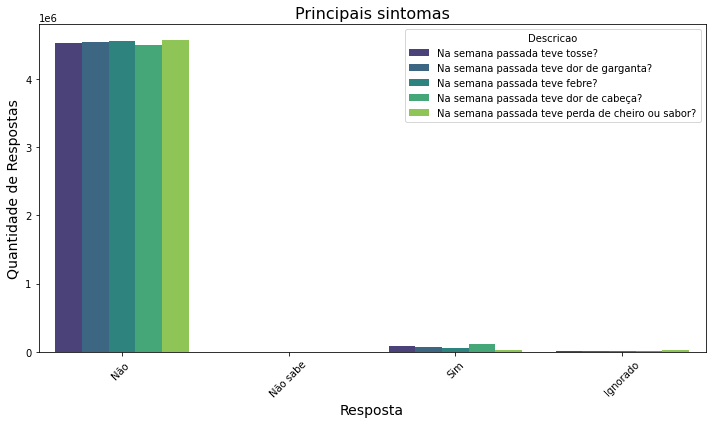

In [0]:


# Filtrar os dados para as perguntas 'B0013' e 'B0015'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta.isin('B0013', 'B0015', 'B0012', 'B0011', 'B00111'))

# Contar as ocorrências de respostas para cada uma das perguntas
df_agrupado = df_filtrado.groupBy("Descricao", "Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras comparando as respostas
plt.figure(figsize=(10, 6))
sns.barplot(x="Descricao_variavel", y="count", hue="Descricao", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Principais sintomas', fontsize=16)
plt.xlabel('Resposta', fontsize=14)
plt.ylabel('Quantidade de Respostas', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




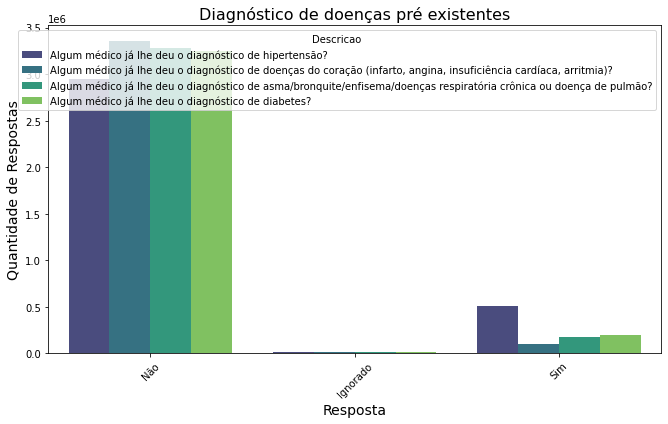

In [0]:
# Filtrar os dados para as perguntas 'B0013' e 'B0015'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta.isin('B0101', 'B0102', 'B0103', 'B0104'))

# Contar as ocorrências de respostas para cada uma das perguntas
df_agrupado = df_filtrado.groupBy("Descricao", "Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras comparando as respostas
plt.figure(figsize=(10, 6))
sns.barplot(x="Descricao_variavel", y="count", hue="Descricao", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Diagnóstico de doenças pré existentes', fontsize=16)
plt.xlabel('Resposta', fontsize=14)
plt.ylabel('Quantidade de Respostas', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

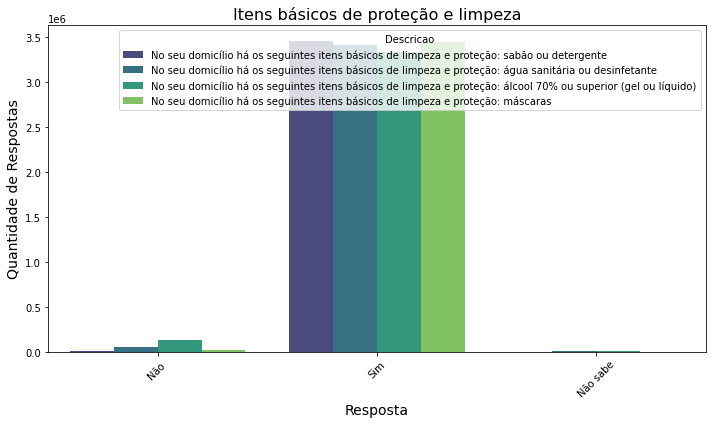

In [0]:

# Filtrar os dados para as perguntas 'B0013' e 'B0015'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta.isin('F002A1', 'F002A2', 'F002A3', 'F002A5'))

# Contar as ocorrências de respostas para cada uma das perguntas
df_agrupado = df_filtrado.groupBy("Descricao", "Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras comparando as respostas
plt.figure(figsize=(10, 6))
sns.barplot(x="Descricao_variavel", y="count", hue="Descricao", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Itens básicos de proteção e limpeza', fontsize=16)
plt.xlabel('Resposta', fontsize=14)
plt.ylabel('Quantidade de Respostas', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

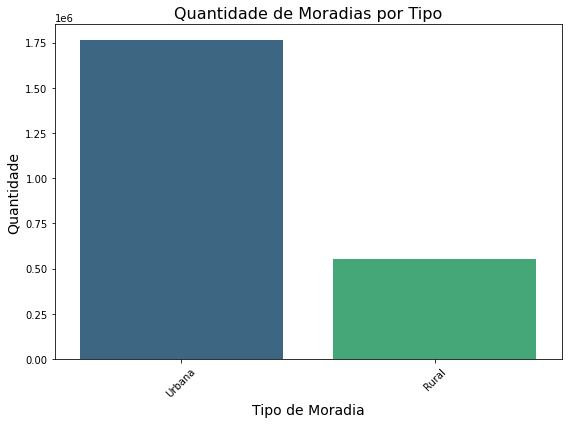

In [0]:
# Filtrar os dados onde 'cod_pergunta' é igual a 'V1022'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta == 'V1022')

# Agrupar os dados filtrados por tipo de moradia e contar as ocorrências
df_agrupado = df_filtrado.groupBy("Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Descricao_variavel", y="count", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Quantidade de Moradias por Tipo', fontsize=16)
plt.xlabel('Tipo de Moradia', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

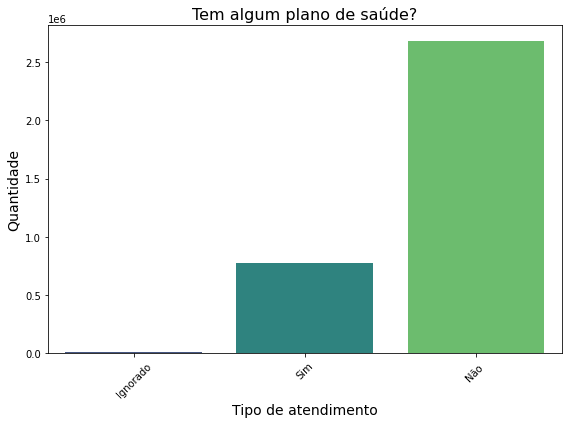

In [0]:
# Filtrar os dados onde 'cod_pergunta' é igual a 'V1022'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta == 'B007')

# Agrupar os dados filtrados por tipo de moradia e contar as ocorrências
df_agrupado = df_filtrado.groupBy("Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Descricao_variavel", y="count", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Tem algum plano de saúde?', fontsize=16)
plt.xlabel('Tipo de atendimento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

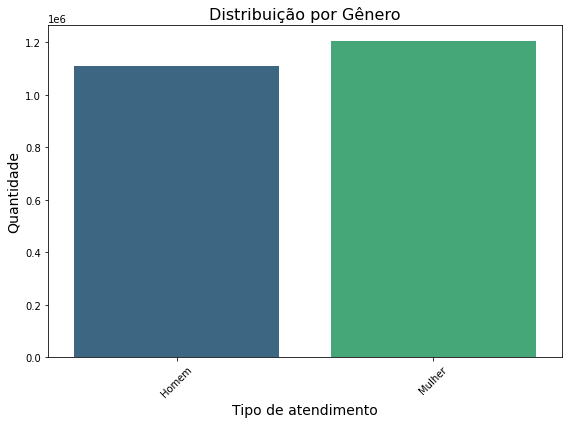

In [0]:
# Filtrar os dados onde 'cod_pergunta' é igual a 'V1022'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta == 'A003')

# Agrupar os dados filtrados por tipo de moradia e contar as ocorrências
df_agrupado = df_filtrado.groupBy("Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Descricao_variavel", y="count", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Distribuição por Gênero', fontsize=16)
plt.xlabel('Tipo de atendimento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

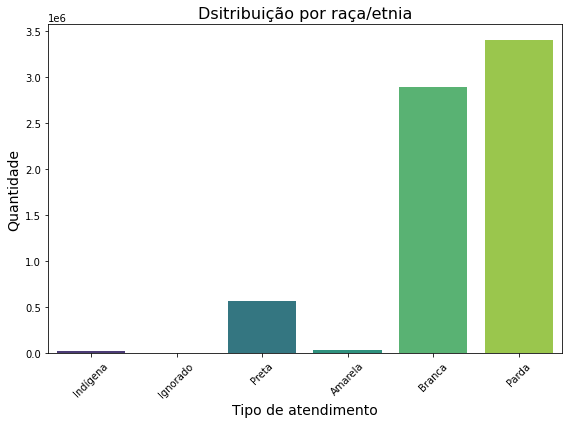

In [0]:
# Filtrar os dados onde 'cod_pergunta' é igual a 'V1022'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta == 'A004')

# Agrupar os dados filtrados por tipo de moradia e contar as ocorrências
df_agrupado = df_filtrado.groupBy("Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Descricao_variavel", y="count", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Dsitribuição por raça/etnia', fontsize=16)
plt.xlabel('Tipo de atendimento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Ajustar layout e exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

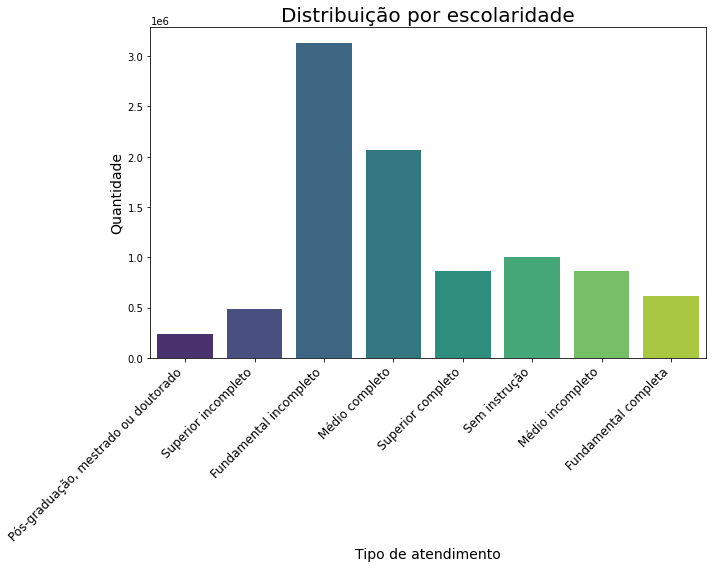

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filtrar os dados onde 'cod_pergunta' é igual a 'V1022'
df_filtrado = tb_completa.filter(tb_completa.cod_pergunta == 'A005')

# Agrupar os dados filtrados por tipo de moradia e contar as ocorrências
df_agrupado = df_filtrado.groupBy("Descricao_variavel").count()

# Converter para Pandas para visualização
df_agrupado_pd = df_agrupado.toPandas()
# Plotar o gráfico de barras
plt.figure(figsize=(10, 8))  # Aumentei o tamanho da figura para melhorar o espaço
sns.barplot(x="Descricao_variavel", y="count", data=df_agrupado_pd, palette="viridis")

# Adicionar título e rótulos
plt.title('Distribuição por escolaridade', fontsize=20)
plt.xlabel('Tipo de atendimento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Ajustar layout para garantir que a legenda fique visível e alinhada
plt.xticks(rotation=45, ha="right", fontsize=12)  # Ajustei o alinhamento da legenda
plt.tight_layout()  # Garante que o gráfico se ajuste bem na tela

# Exibir o gráfico
plt.show()
